In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_paths = glob('./dataset/mnist_png/training/0/*.png')
data_paths[0]

'./dataset/mnist_png/training/0/15854.png'

In [3]:
path = data_paths[0]
path

'./dataset/mnist_png/training/0/15854.png'

In [6]:
data_paths = tf.io.matching_files('./dataset/mnist_png/training/*/*.png')

In [7]:
path = data_paths[0]
path

<tf.Tensor: id=7, shape=(), dtype=string, numpy=b'./dataset/mnist_png/training/0/1.png'>

## Load Image

In [8]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [10]:
image.shape

TensorShape([28, 28, 1])

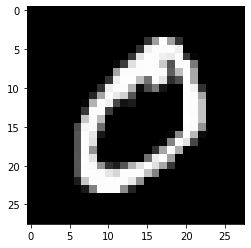

In [13]:
plt.imshow(image[:, :, 0], 'gray')

## Set Data Generator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

In [16]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [28]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

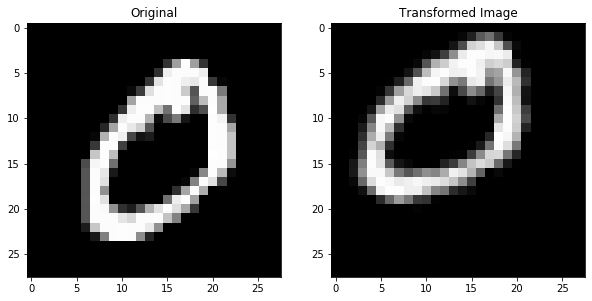

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Original")
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(np.squeeze(image), 'gray')

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

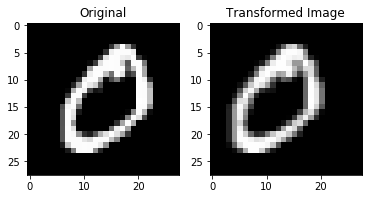

In [33]:
datagen = ImageDataGenerator(
    width_shift_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original")
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(np.squeeze(outputs), 'gray')

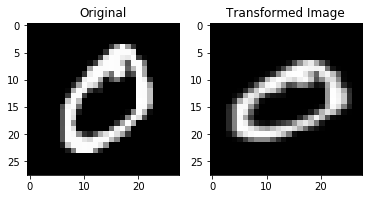

In [36]:
datagen = ImageDataGenerator(
    zoom_range=0.5
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original")
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(np.squeeze(outputs), 'gray')

## Rescale시 주의사항

In [37]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
)